In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#raw = pd.read_csv('C:\\Users\\ADMIN\\Documents\\Datasets\\BigBasket\\bigBasketCSV.csv')
raw = pd.read_csv('C:\\Users\\Mk\\Documents\\Datasets\\BigBasket\\bigBasket.csv')

In [7]:
raw.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014,Other Sauces
1,M09736,6468572,15669800,22-09-2014,Cashews
2,M09736,6468572,34989501,22-09-2014,Other Dals
3,M09736,6468572,7572303,22-09-2014,Namkeen
4,M09736,6468572,15669856,22-09-2014,Sugar


#Data Cleaning

In [8]:
#Finding NaN
NanCount = raw.isna().sum()
NanCount

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [9]:
#Finding mistake in text columns
UniqueItems = raw['Description'].unique()
UniqueItems.shape

(216,)

In [20]:
CntUniqueItems = np.zeros(len(UniqueItems))
for i in range(len(UniqueItems)):
    CntUniqueItems[i] = raw[raw['Description'] == UniqueItems[i]]['Description'].count()

(array([7.439e+03, 3.052e+03, 1.628e+03, 2.538e+03, 1.082e+04, 3.801e+03,
        5.446e+03, 4.135e+03, 1.889e+03, 1.675e+03, 5.695e+03, 3.018e+03,
        1.282e+03, 5.550e+02, 7.150e+02, 5.240e+02, 2.220e+02, 1.077e+03,
        3.030e+02, 1.579e+03, 4.720e+02, 2.650e+02, 1.750e+02, 4.720e+02,
        8.270e+02, 1.050e+02, 1.770e+02, 7.560e+02, 1.230e+02, 4.500e+02,
        1.250e+02, 8.100e+01, 1.020e+02, 4.800e+01, 4.700e+01, 5.600e+01,
        6.300e+01, 1.410e+02, 1.700e+01, 5.800e+01, 3.700e+01, 1.600e+01,
        4.100e+01, 3.700e+01, 1.600e+01, 8.000e+00, 9.000e+00, 1.200e+01,
        7.000e+00, 5.000e+00]),
 array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
         38.7,  43. ,  47.3,  51.6,  55.9,  60.2,  64.5,  68.8,  73.1,
         77.4,  81.7,  86. ,  90.3,  94.6,  98.9, 103.2, 107.5, 111.8,
        116.1, 120.4, 124.7, 129. , 133.3, 137.6, 141.9, 146.2, 150.5,
        154.8, 159.1, 163.4, 167.7, 172. , 176.3, 180.6, 184.9, 189.2,
        193.5, 197.8,

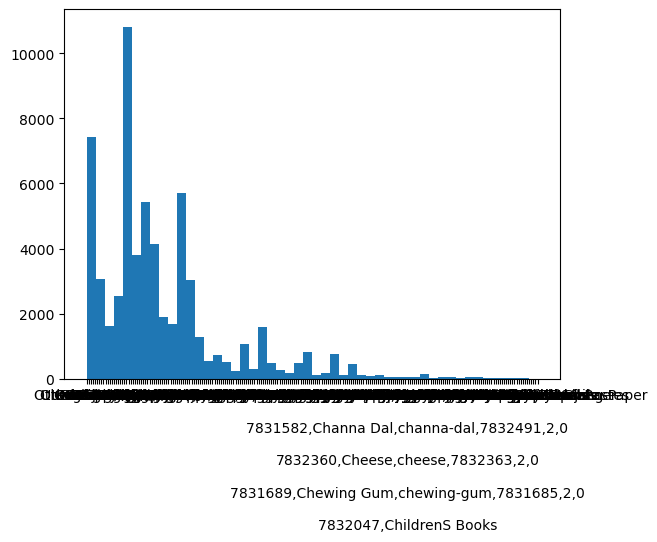

In [28]:
plt.hist(raw['Description'], bins=50)

In [30]:
UniqueItems.sort()

In [33]:
for i in range(len(UniqueItems)):
    print(UniqueItems[i],'\n')

After Shave 

Agarbatti 

Almonds 

Aluminium Foil & Cling Wrap 

Antiseptics 

Avalakki / Poha 

Ayurvedic 

Ayurvedic Food 

Baby Care Accessories 

Baby Cereal 

Bakery & Breads 

Baking Ingredients 

Banana 

Basmati Rice 

Battery 

Beans 

Besan 

Beverages 

Biscuits 

Body Lotion 

Body Wash 

Boiled Rice 

Bottle & Tin Openers 

Bread 

Brinjals 

Brooms & Dust Pans 

Brushes & Scrubbers 

Buns & Pavs 

Butter & Cream 

Buttermilk 

CFLs,cfls,7832553,2,0

7831582,Channa Dal,channa-dal,7832491,2,0

7832360,Cheese,cheese,7832363,2,0

7831689,Chewing Gum,chewing-gum,7831685,2,0

7832047,ChildrenS Books 

Cakes 

Car Freshener 

Car Shampoo & Wax 

Cashews 

Chilli & Soya Sauces 

Chinese Noodles 

Chips 

Chocolate 

Cleaning & Dust Cloth 

Colours  

Containers 

Cookery Books 

Cookies 

Cooking Paste 

Cooking Sauce 

Corn Snacks 

Cotton & Bandages 

Cream Biscuits 

Curd 

Cut Vegetables 

Cutlery 

Cutters, Peelers & Scrapers 

Dairy & Cheese 

Diapers & Wipes 

Dishwash Li

Modify following Items
Festive Gift Pack, Festive Gift Packs 
Soup, Soups
Toilet Cleaners, Toilet Cleaning

In [43]:
# Replace item names
#UniqueItems = raw['Description'].unique()
raw_process = raw.copy()
raw_process['Description'] = raw_process['Description'].replace('Festive Gift Pack', 'Festive Gift Packs')
raw_process['Description'] = raw_process['Description'].replace('Soup', 'Soups')
raw_process['Description'] = raw_process['Description'].replace('Toilet Cleaning', 'Toilet Cleaners')


In [56]:
#Change 'Created On' to Date Format YYYY-MM-DD
raw_process['Created On'] = pd.to_datetime(raw['Created On'], dayfirst=True)

In [74]:
#Check dates are consecutive
raw_process['Created On Temp'] = raw_process['Created On']
raw_process['Created On Temp'] = raw_process['Created On'][1:]
if ~(len(raw_process[raw_process['Created On Temp']<raw_process['Created On']])):
    print('Dates are consecutive')
else
    print('Dates are not consecutive')

Dates are consecutive


#Data Cleaning is completed